# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


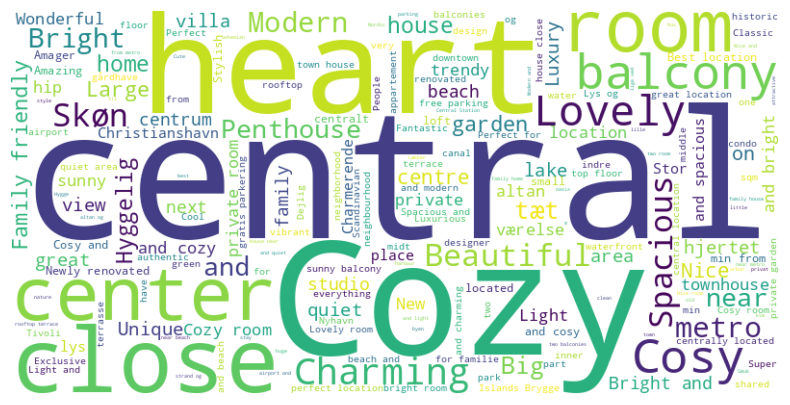

In [10]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv("listings.csv")

# filter relevant columns
data_limited = data[
    [
        "id",
        "name",
        "host_id",
        "host_name",
        "neighbourhood_cleansed",
        "latitude",
        "longitude",
        "room_type",
        "price",
        "minimum_nights",
        "number_of_reviews",
        "last_review",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited["number_of_reviews"] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered["price"] = (
    data_filtered["price"].replace("[\\$,]", "", regex=True).astype(float)
)

# Calculate the median price
median_price = data_filtered["price"].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered["price_category"] = (data_filtered["price"] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = [
    "Østerbro",
    "Copenhagen",
    "København",
    "in",
    "bedroom",
    "bedrooms",
    "bed",
    "beds",
    "bath",
    "baths",
    "Frederiksberg",
    "V",
    "Ø",
    "SV",
    "S",
    "N",
    "K",
    "C",
    "W",
    "kbh",
    "Ballerup",
    "Hellerup",
    "Valby",
    "Vanløse",
    "Brønhøj",
    "Nørrebro",
    "Vesterbro",
    "CPH",
    "with",
    "to",
    "of",
    "a",
    "the",
    "på",
    "i",
    "med",
    "af",
    "at",
    "city",
    "by",
    "apartment",
    "appartment",
    "lejlighed",
    "flat",
    "m2",
    "apt",
]

# Convert the 'name' column to a single string
text = " ".join(data_filtered["name"].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(
    stopwords=stop_words, background_color="white", width=800, height=400
).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

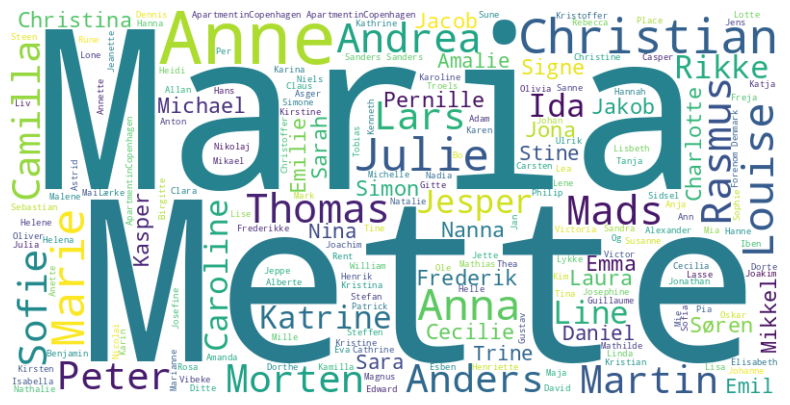

In [11]:
names = data_filtered["host_name"]

import re

pattern = re.compile(
    r"^[A-ZÆØÅ]\w*(?:\s[A-ZÆØÅ]\w*)*$"
)  # regex = starts with a capital letter
personal = names[names.str.match(pattern)]

names_string = " ".join(personal.astype(str))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    names_string
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

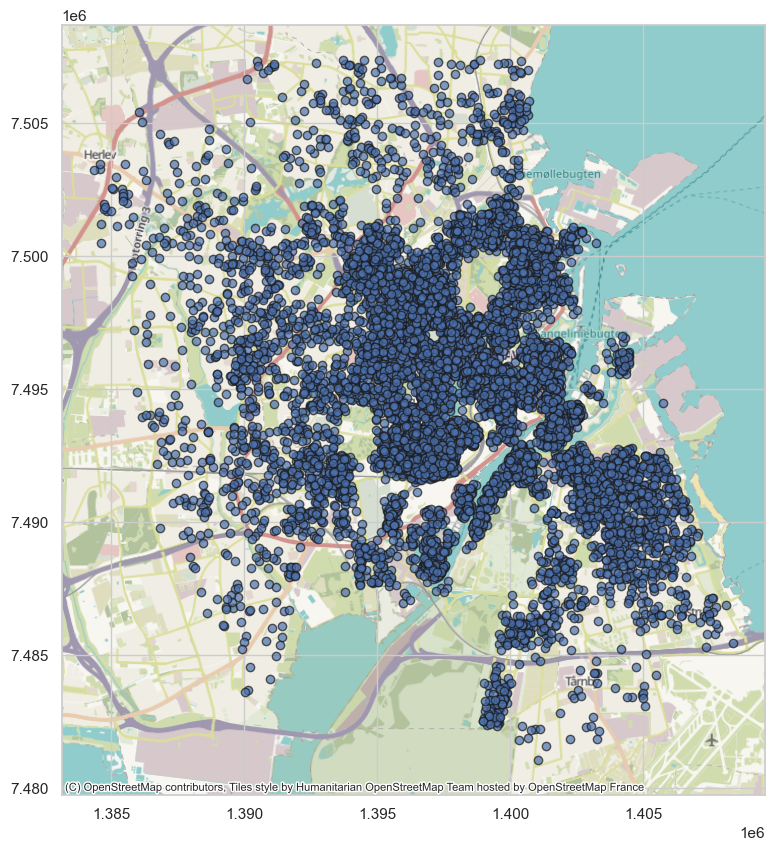

In [12]:
# data_filtered.head()

# import geopandas as gpd

# geo_data_filtered = gpd.GeoDataFrame(
#   data_filtered,
#   geometry=gpd.points_from_xy(data_filtered.longitude, data_filtered.latitude),
# )

# geo_data_filtered.plot()
# plt.show()

import geopandas as gpd
import contextily as cx

geo_data_filtered = gpd.GeoDataFrame(
    data_filtered,
    geometry=gpd.points_from_xy(data_filtered.longitude, data_filtered.latitude),
    crs="EPSG:4326",  # WGS84 - most GPS coordinates use this
)

geo_data_filtered = geo_data_filtered.to_crs(epsg=3857)

# Plot with real map background
ax = geo_data_filtered.plot(figsize=(10, 10), alpha=0.7, edgecolor="k")
cx.add_basemap(ax)  # You can change the provider


plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

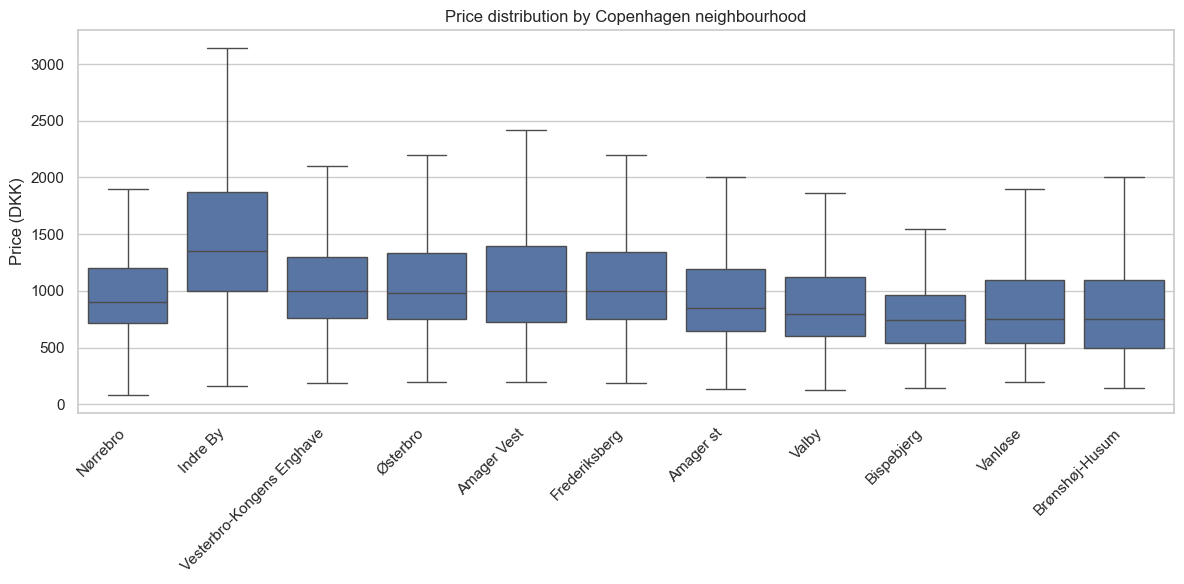

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed",
    y="price",
    data=data_filtered,
    showfliers=False,
)


plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Price (DKK)")
plt.title("Price distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

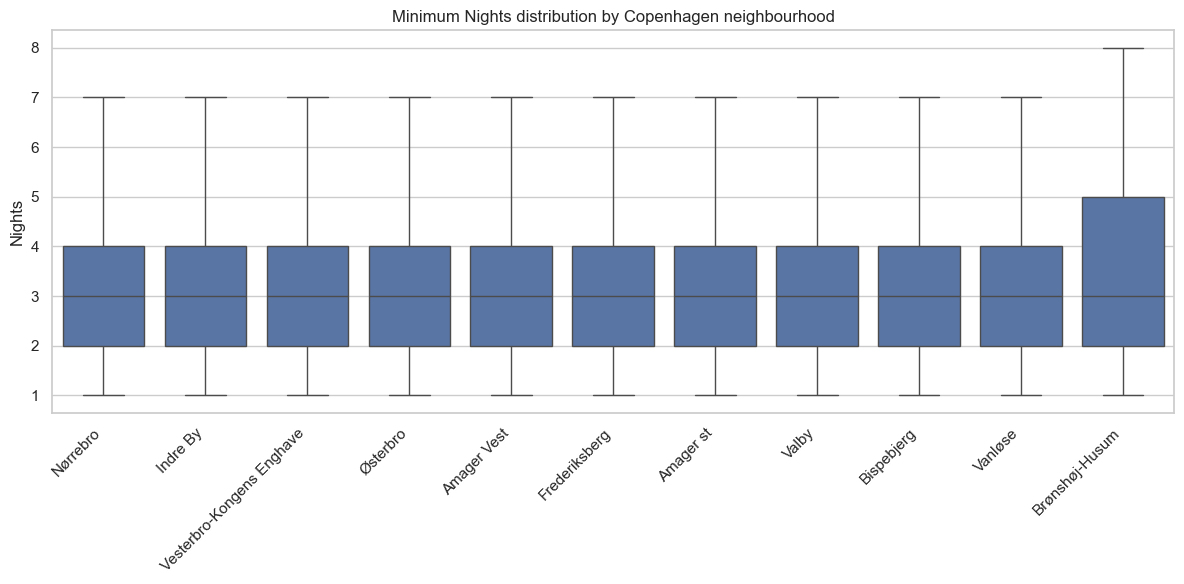

In [14]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed", y="minimum_nights", data=data_filtered, showfliers=False
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Nights")
plt.title("Minimum Nights distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

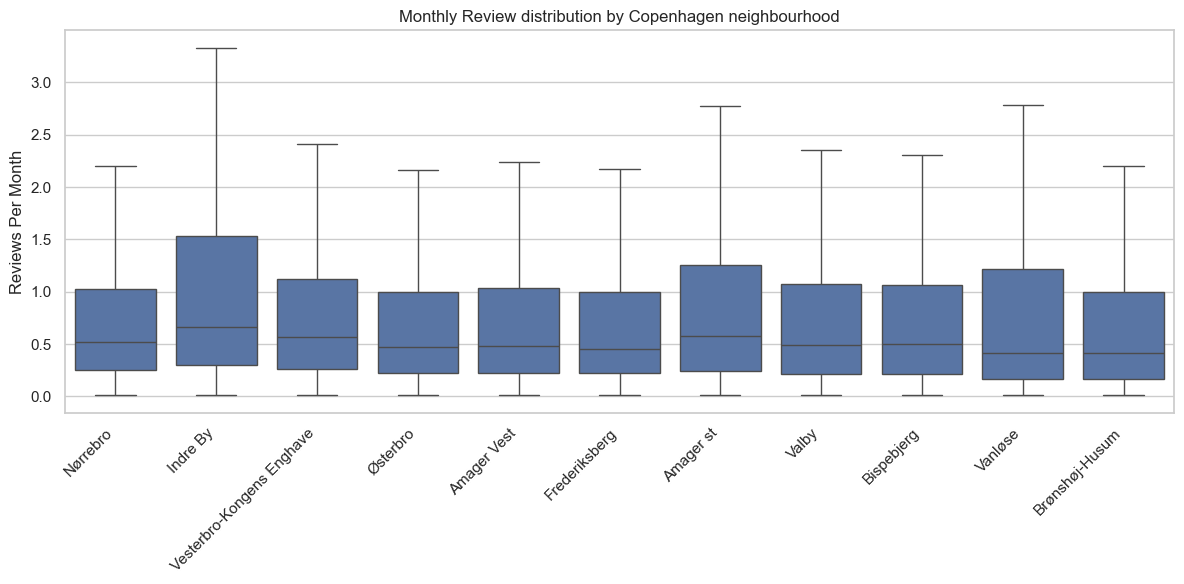

In [15]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed",
    y="reviews_per_month",
    data=data_filtered,
    showfliers=False,
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Reviews Per Month")
plt.title("Monthly Review distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [16]:
# group by neighbourhood and room_type
grp = data_filtered.groupby(["neighbourhood_cleansed", "room_type"])

# describe availability_365
avail_desc = grp["availability_365"].describe()
avail_mode = grp["availability_365"].agg(lambda x: x.mode().iloc[0]).rename("mode")

# merge into one DataFrame
summary_availability = pd.concat([avail_desc, avail_mode], axis=1)

summary_availability

count        mean         std  \
neighbourhood_cleansed    room_type                                         
Amager Vest               Entire home/apt   909.0   85.606161  117.628742   
                          Private room      148.0  110.709459  128.254172   
                          Shared room         2.0  365.000000    0.000000   
Amager st                 Entire home/apt   791.0   75.204804  109.420874   
                          Hotel room          3.0  330.000000   16.000000   
                          Private room      129.0  122.232558  139.345317   
                          Shared room         1.0  365.000000         NaN   
Bispebjerg                Entire home/apt   508.0   81.968504  117.881777   
                          Private room       95.0  143.189474  135.931561   
                          Shared room         1.0  364.000000         NaN   
Brønshøj-Husum            Entire home/apt   216.0   91.865741  117.916666   
                          Private room       67.0  141.835821  131.871448   
                          Shared room         2.0  124.000000   69.296465   
Frederiksberg             Entire home/apt  1044.0   83.057471  116.654601   
                          Private room      133.0  114.684211  139.429105   
Indre By                  Entire home/apt  1702.0  116.042303  131.890993   
                          Hotel room         10.0  313.500000   66.595379   
                          Private room      128.0  135.812500  139.361240   
                          Shared room         4.0  231.250000  154.169550   
Nørrebro                  Entire home/apt  1889.0   70.733722  110.127202   
                          Private room      165.0   83.503030  117.790566   
                          Shared room         3.0  118.000000  158.811209   
Valby                     Entire home/apt   450.0   71.028889  106.216137   
                          Private room       89.0  138.696629  136.875226   
Vanløse                   Entire home/apt   254.0   70.862205  100.572711   
                          Private room       44.0  129.409091  130.103772   
Vesterbro-Kongens Enghave Entire home/apt  1811.0   71.322474  107.046945   
                          Private room      221.0  100.226244  124.587185   
                          Shared room         2.0  206.000000  128.693434   
Østerbro                  Entire home/apt  1174.0   90.468484  118.633576   
                          Private room      130.0  132.546154  141.340981   
                          Shared room         1.0   83.000000         NaN   

                                             min     25%    50%     75%  \
neighbourhood_cleansed    room_type                                       
Amager Vest               Entire home/apt    0.0    0.00   15.0  145.00   
                          Private room       0.0    0.00   51.5  231.00   
                          Shared room      365.0  365.00  365.0  365.00   
Amager st                 Entire home/apt    0.0    0.00   10.0  117.50   
                          Hotel room       314.0  322.00  330.0  338.00   
                          Private room       0.0    0.00   61.0  262.00   
                          Shared room      365.0  365.00  365.0  365.00   
Bispebjerg                Entire home/apt    0.0    0.00    9.0  129.00   
                          Private room       0.0    0.00   90.0  270.00   
                          Shared room      364.0  364.00  364.0  364.00   
Brønshøj-Husum            Entire home/apt    0.0    0.00   22.5  171.50   
                          Private room       0.0   30.00   82.0  261.50   
                          Shared room       75.0   99.50  124.0  148.50   
Frederiksberg             Entire home/apt    0.0    0.00   13.5  145.00   
                          Private room       0.0    0.00   25.0  235.00   
Indre By                  Entire home/apt    0.0    0.00   51.0  249.75   
                          Hotel room       191.0  314.00  339.0  356.00   


- **Entire home/apt**  
  - In the most central areas (e.g. **Indre By**, **Vesterbro-Kongens Enghave**, **Nørrebro**) the _median_ availability is very low (around 50–90 days), while the _mean_ is pulled up by a few listings with almost-year-round availability.  This tells us that most entire apartments here are booked most of the year, with only a few “outliers” remaining empty for long stretches.  
  - In more peripheral areas (e.g. **Valby**, **Vanløse**, **Bispebjerg**) the median and mean are higher (100–150 days), indicating a more balanced mix of popular and less-in-demand listings.

- **Private room**  
  - Private rooms generally show higher median availability than entire homes across *all* neighbourhoods (often 80–150 days).  This suggests lower overall demand or more flexible pricing for single-room rentals.  
  - The standard deviation is large in both central and outer districts, meaning there’s still a wide variety—some rooms are in constant use, others rarely booked.

- **Shared room**  
  - Sample sizes are very small; all modes are at the high end (often 365 days), meaning that most shared rooms are either barely used or only listed occasionally.

Key takeaways:  
1. **Demand is highest** (lowest median availability) for entire apartments in the city centre.  
2. **Private rooms** offer more “dead days” across the board.  
3. **Outliers** (mode = 0 or 365) remind us to check for listings that may be mis-configured (e.g. host never opens calendar).  
4. For a “self-chosen feature” you could repeat the same process on, say, `reviews_per_month` or `minimum_nights` to compare occupancy patterns with review frequency or stay length.

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder_neighbourhood = LabelEncoder()
label_encoder_room_type = LabelEncoder()


# Select features for KNN
knn_data = data_filtered[[
    "latitude",
    "longitude",
    "minimum_nights",
    "neighbourhood_cleansed",
    "room_type",
    "price",
    "number_of_reviews",  
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_location",
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",
]].copy()  # Create a copy to avoid SettingWithCopyWarning later

# Apply Label Encoding
knn_data.loc[:, "neighbourhood_encoded"] = label_encoder_neighbourhood.fit_transform(
    knn_data["neighbourhood_cleansed"]
)
knn_data.loc[:, "room_type_encoded"] = label_encoder_room_type.fit_transform(
    knn_data["room_type"]
)

knn_data = knn_data.drop(
    [
        "neighbourhood_cleansed",
        "room_type",
        "price",  # initial not encoded columns dropped and price dropped
        "neighbourhood_encoded",  # worse when added
        # 'room_type_encoded', best performing metric!
        # "latitude", # better, seems like lat,long makes more difference than neighbourhood
        # "longitude", # better
        "minimum_nights",  # almost no difference
        # "number_of_reviews", # no difference for all reviews
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_location",
        "review_scores_checkin",
        # "review_scores_communication"  ,
        "review_scores_value",
        "reviews_per_month",
        # "calculated_host_listings_count" ,  
        # "availability_365, - this is way better
    ],
    axis=1,
)

knn_data = pd.concat([knn_data, data_filtered["price_category"]], axis=1)

# Prepare data for modeling
X = knn_data.iloc[:, :-1]  # All columns except the last one
Y = knn_data.iloc[:, -1]  # The last column (price_category)
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)
# Standard Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=111, metric="manhattan")
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)
print("Accuracy score with train data: {}".format(classifier.score(X_train, Y_train)))
print("Accuracy score with test data: {}".format(classifier.score(X_test, Y_test)))

Accuracy score with train data: 0.7006185567010309
Accuracy score with test data: 0.7098103874690849
